In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import skew
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv('Auto1-DS-TestData.csv', na_values=['?'])
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [3]:
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [4]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
df.isna().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [6]:
df.dropna(subset=['price'], axis='index', inplace=True)

In [7]:
df.fillna(df.median(), inplace=True)

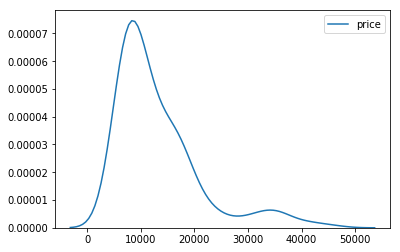

In [8]:
sns.kdeplot(df['price'])

In [9]:
df['symboling'] = pd.Categorical(df['symboling'], ordered=True)

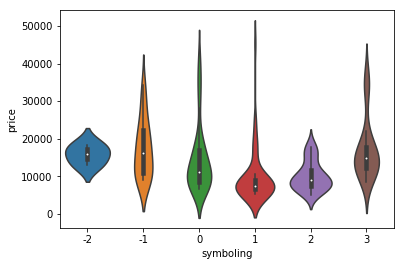

In [10]:
sns.violinplot(df['symboling'], df['price'])

In [11]:
numeric_cols = df.columns.values[(df.dtypes == 'int64') | (df.dtypes == 'float64')]
categorical_cols = df.columns.values[df.dtypes == 'object']

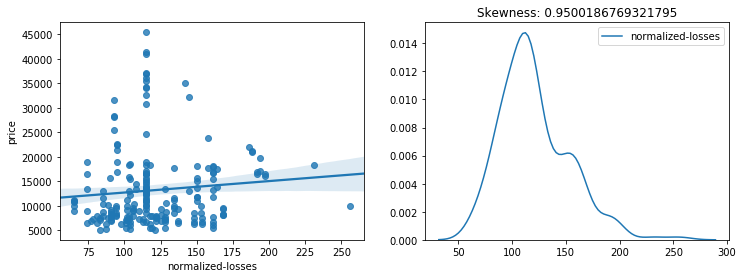

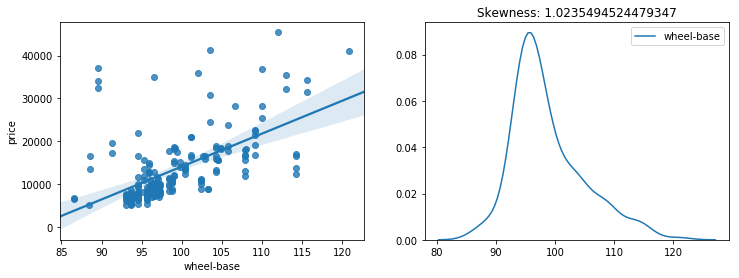

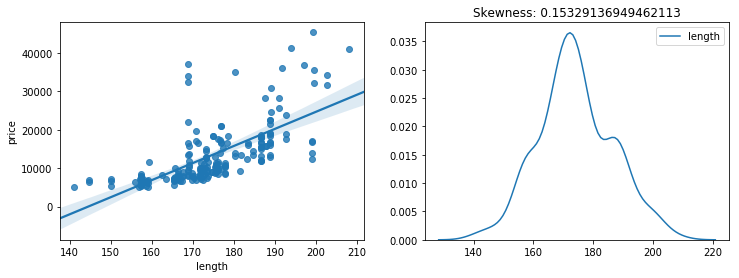

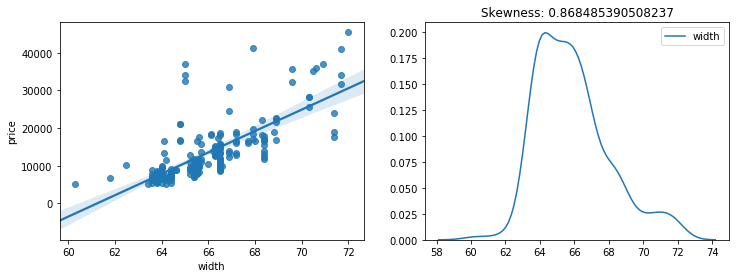

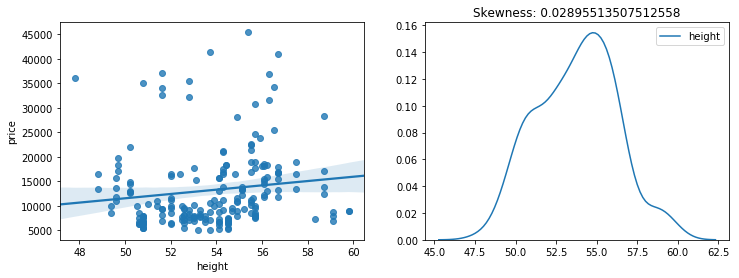

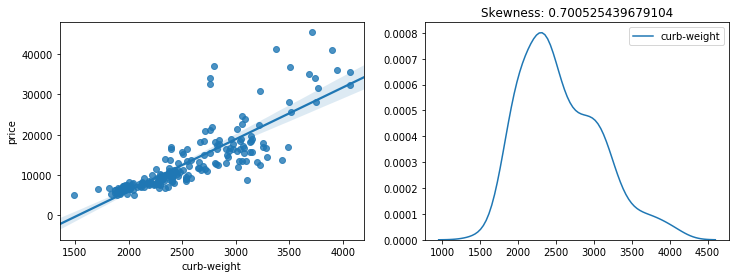

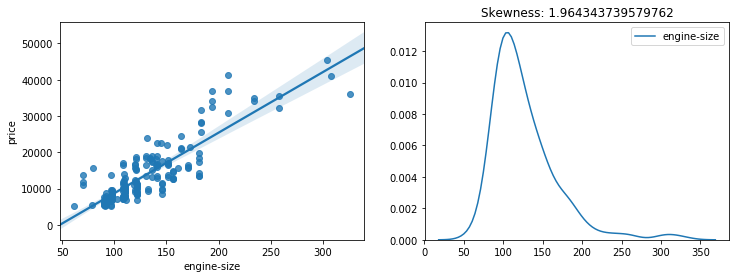

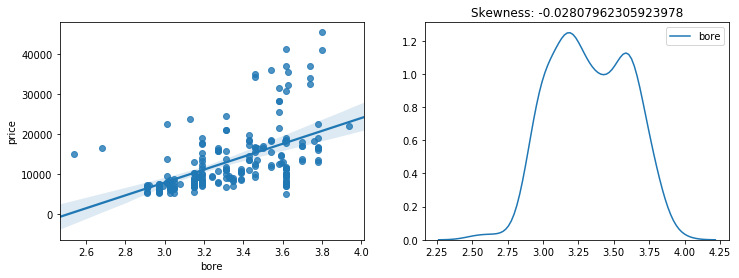

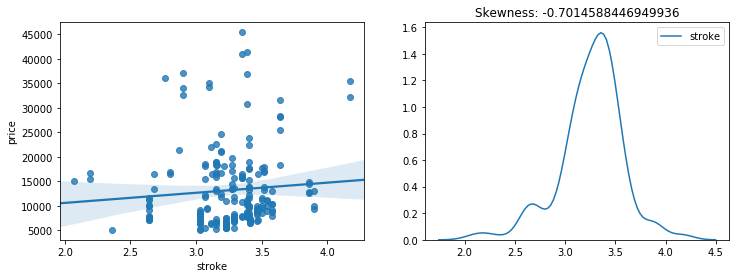

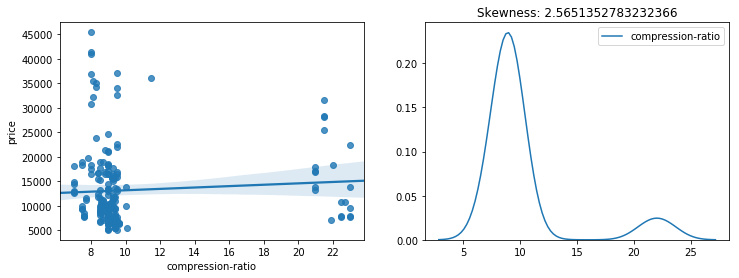

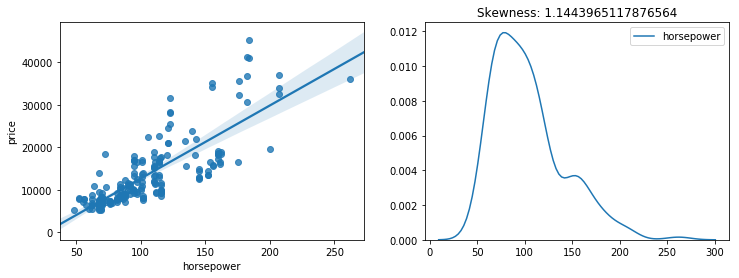

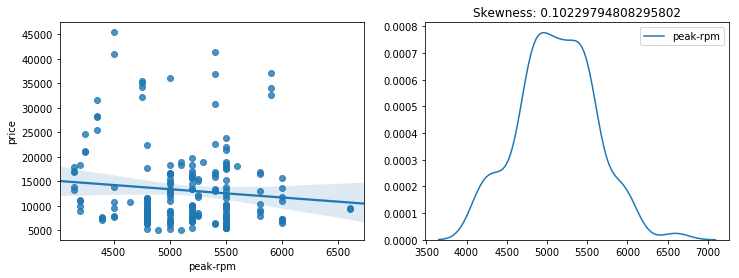

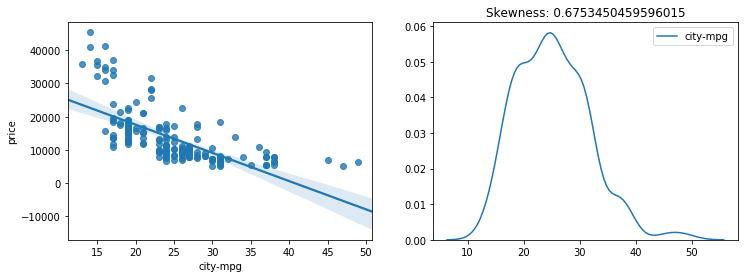

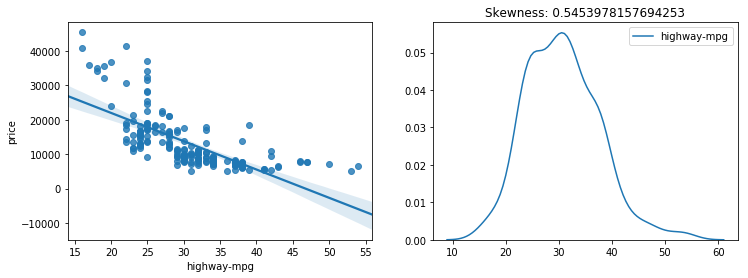

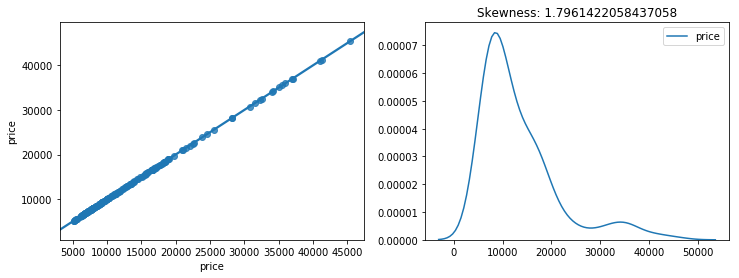

In [12]:
for col in numeric_cols:
    plt.figure(figsize=[12, 4])
    plt.subplot(1, 2, 1)
    sns.regplot(df[col], df['price'])
    plt.subplot(1, 2, 2)
    sns.kdeplot(df[col])
    plt.title('Skewness: {}'.format(skew(df[col])))

In [13]:
final_df = pd.DataFrame()

In [14]:
final_df['symboling'] = df['symboling']

In [15]:
for col in numeric_cols:
    if skew(np.abs(df[col]) > 1.0):
        final_df[col] = np.log(1 + df[col])
    else:
        final_df[col] = df[col]

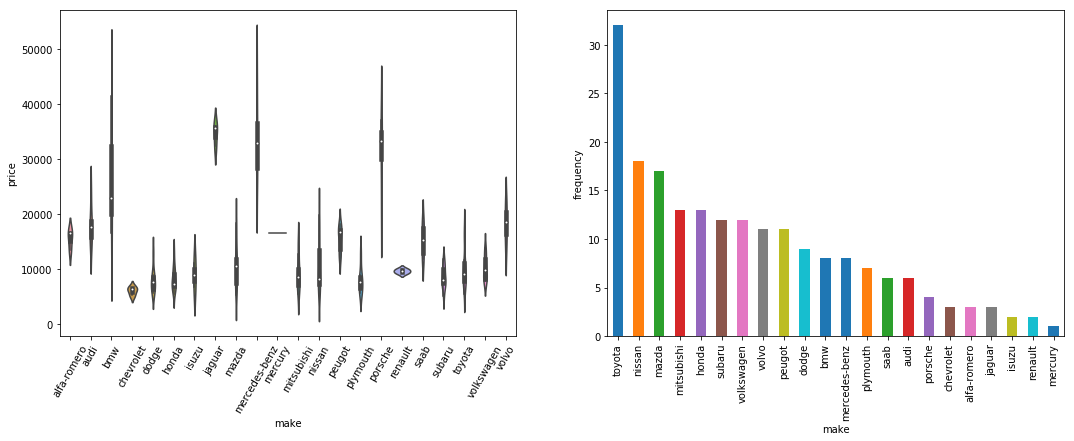

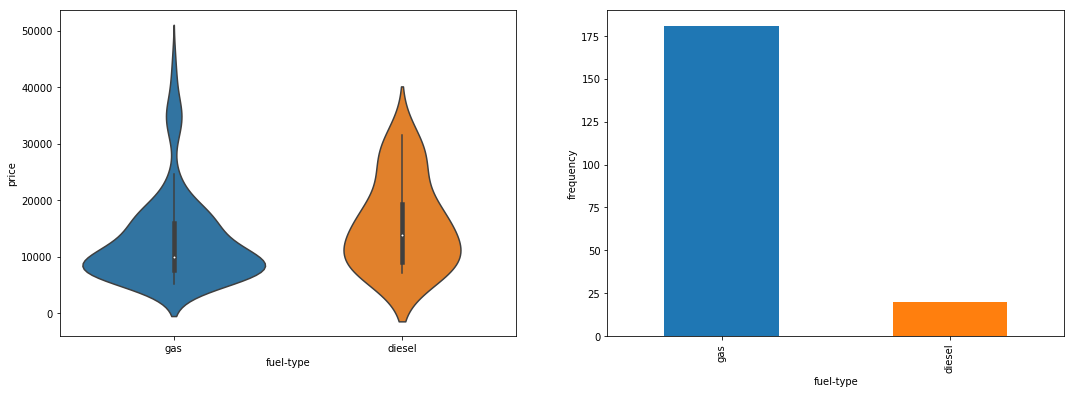

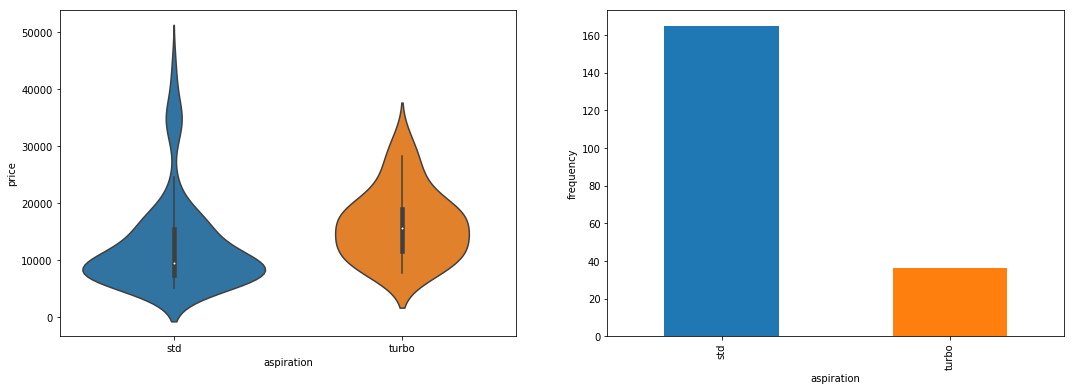

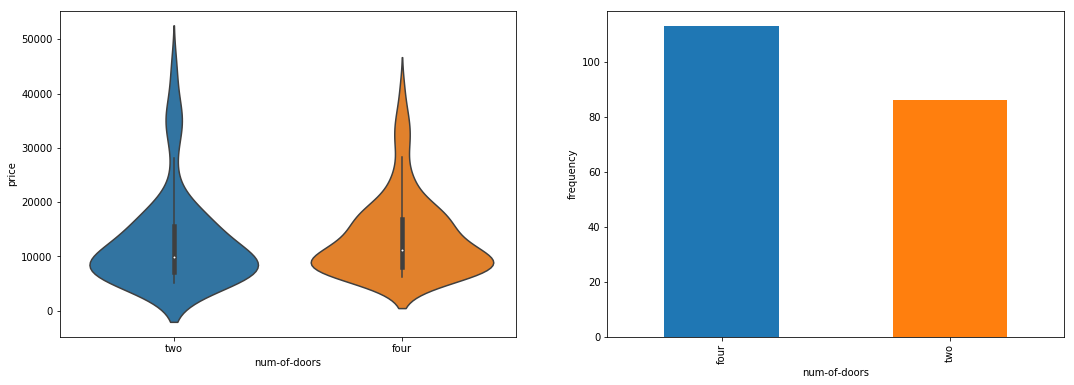

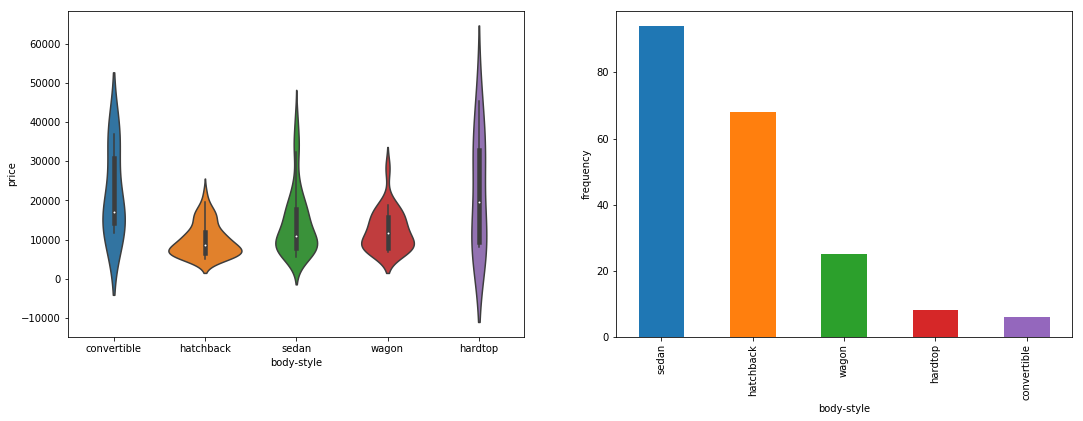

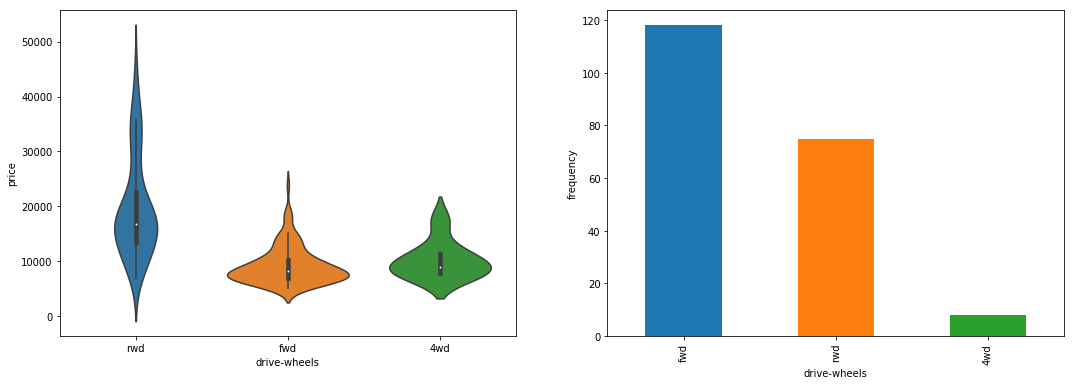

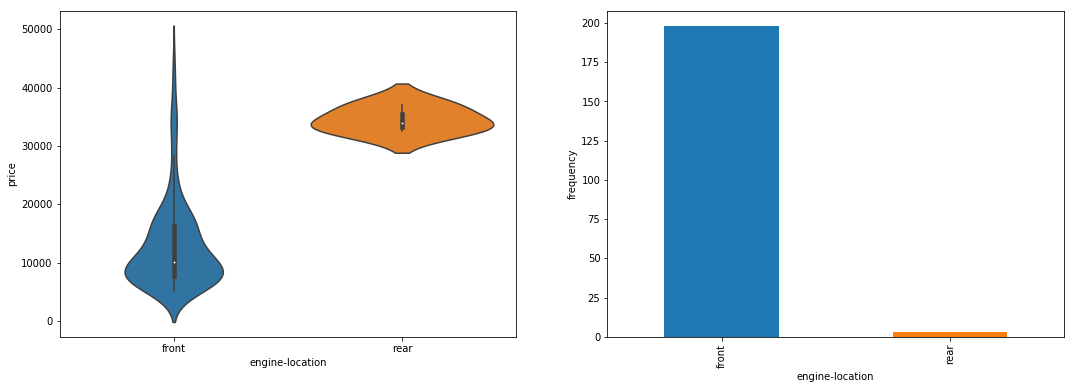

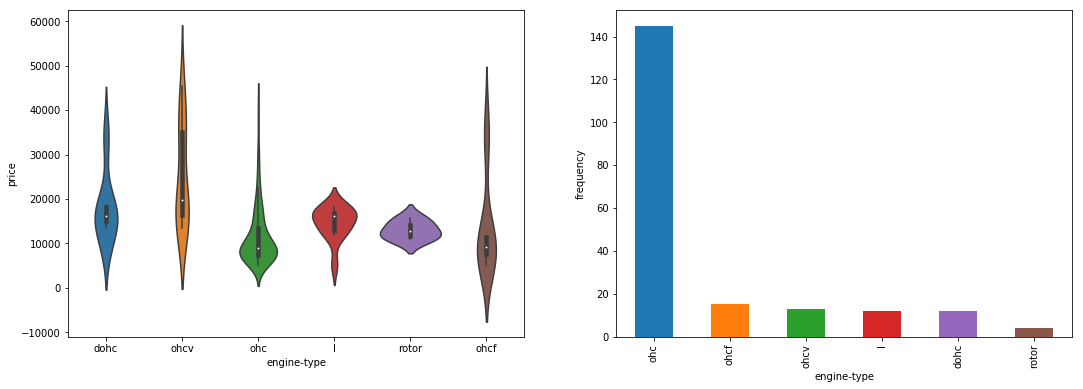

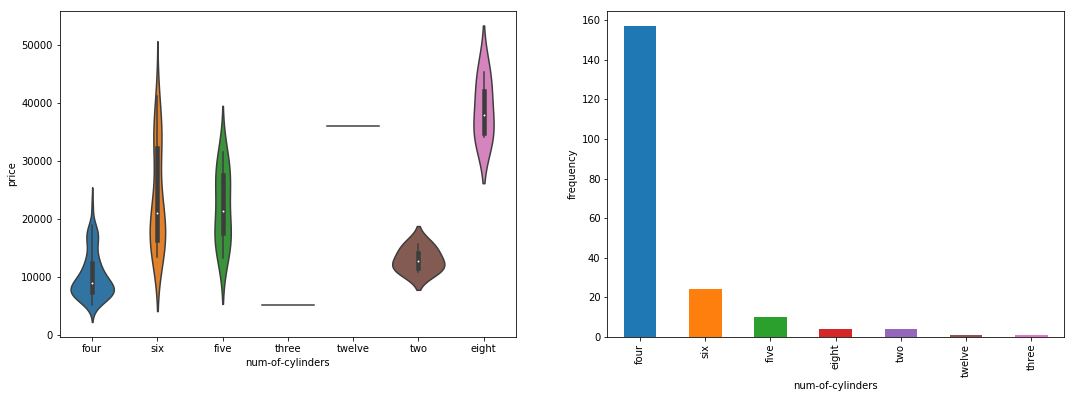

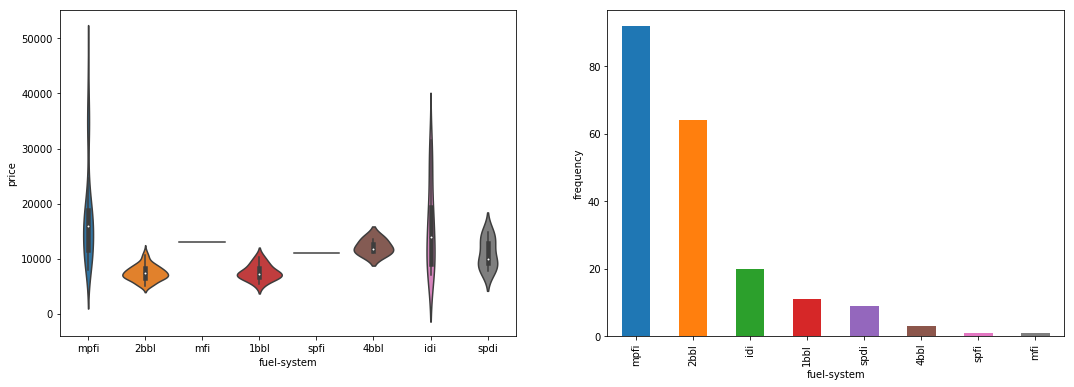

In [16]:
for col in categorical_cols:
    plt.figure(figsize=[18, 6])
    plt.subplot(1, 2, 1)
    sns.violinplot(df[col], df['price'])
    if df[col].nunique() > 10:
        plt.xticks(rotation=60)
    plt.subplot(1, 2, 2)
    df[col].value_counts().plot(kind='bar')
    plt.xlabel(col)
    plt.ylabel('frequency')

In [17]:
final_df.shape

(201, 16)

In [18]:
final_df = final_df.merge(pd.get_dummies(df[['make']]), how='inner', left_index=True, right_index=True)
final_df['fuel-type'] = df['fuel-type'].map({'gas': 0, 'diesel': 1})
final_df['aspiration'] = df['aspiration'].map({'std': 0, 'turbo': 1})
final_df['num-of-doors'] = df['num-of-doors'].map({'two': 0, 'four': 1})
final_df['num-of-doors'].fillna(1, inplace=True)
final_df = final_df.merge(pd.get_dummies(df[['body-style']]), how='inner', left_index=True, right_index=True)
final_df = final_df.merge(pd.get_dummies(df[['drive-wheels']]), how='inner', left_index=True, right_index=True)
final_df['engine-location'] = df['engine-location'].map({'front': 0, 'rear': 1})
final_df = final_df.merge(pd.get_dummies(df[['engine-type']]), how='inner', left_index=True, right_index=True)
final_df = final_df.merge(pd.get_dummies(df[['num-of-cylinders']]), how='inner', left_index=True, right_index=True)
final_df = final_df.merge(pd.get_dummies(df[['fuel-system']]), how='inner', left_index=True, right_index=True)

In [19]:
final_df.shape

(201, 71)

In [20]:
final_df.columns.values

array(['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'make_alfa-romero', 'make_audi',
       'make_bmw', 'make_chevrolet', 'make_dodge', 'make_honda',
       'make_isuzu', 'make_jaguar', 'make_mazda', 'make_mercedes-benz',
       'make_mercury', 'make_mitsubishi', 'make_nissan', 'make_peugot',
       'make_plymouth', 'make_porsche', 'make_renault', 'make_saab',
       'make_subaru', 'make_toyota', 'make_volkswagen', 'make_volvo',
       'fuel-type', 'aspiration', 'num-of-doors',
       'body-style_convertible', 'body-style_hardtop',
       'body-style_hatchback', 'body-style_sedan', 'body-style_wagon',
       'drive-wheels_4wd', 'drive-wheels_fwd', 'drive-wheels_rwd',
       'engine-location', 'engine-type_dohc', 'engine-type_l',
       'engine-type_ohc', 'engine-type_ohcf', 'engine-type_ohcv',
       'eng

In [21]:
final_df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,115.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
1,3,115.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
2,1,115.0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,0,0,0,0,0,0,0,1,0,0
3,2,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
4,2,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0


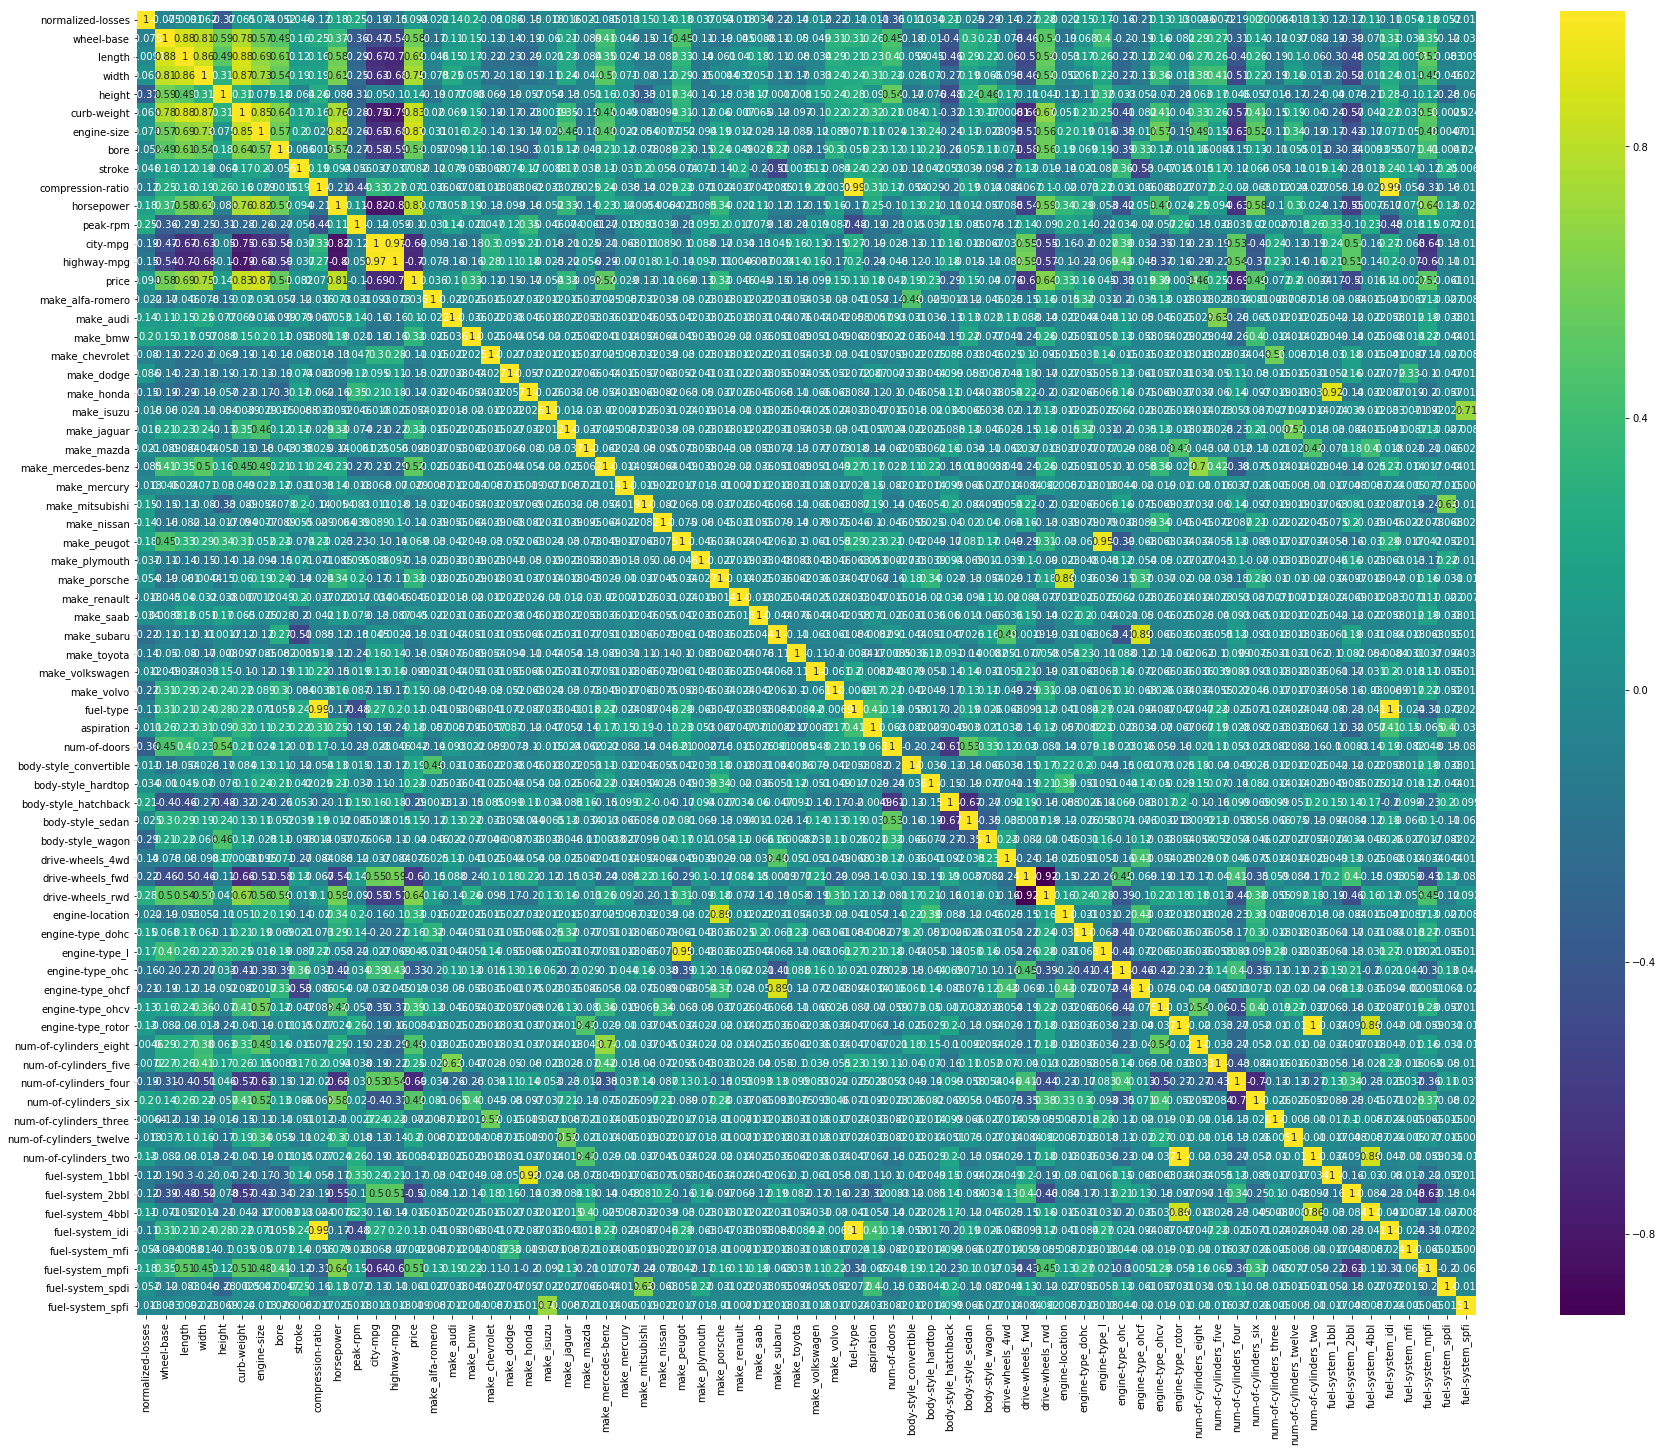

In [22]:
plt.figure(figsize=(30, 24))
sns.heatmap(final_df.corr(), annot=True, cmap='viridis')

In [23]:
features_df = final_df.drop('price', axis='columns')
target_ser = df['price']

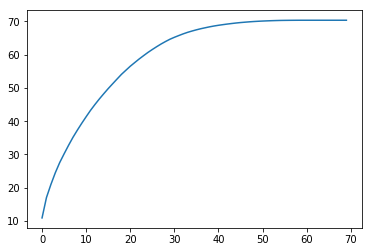

In [24]:
model = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('pca', PCA())
])
model.fit(features_df, target_ser)
plt.plot(model.named_steps['pca'].explained_variance_.cumsum())

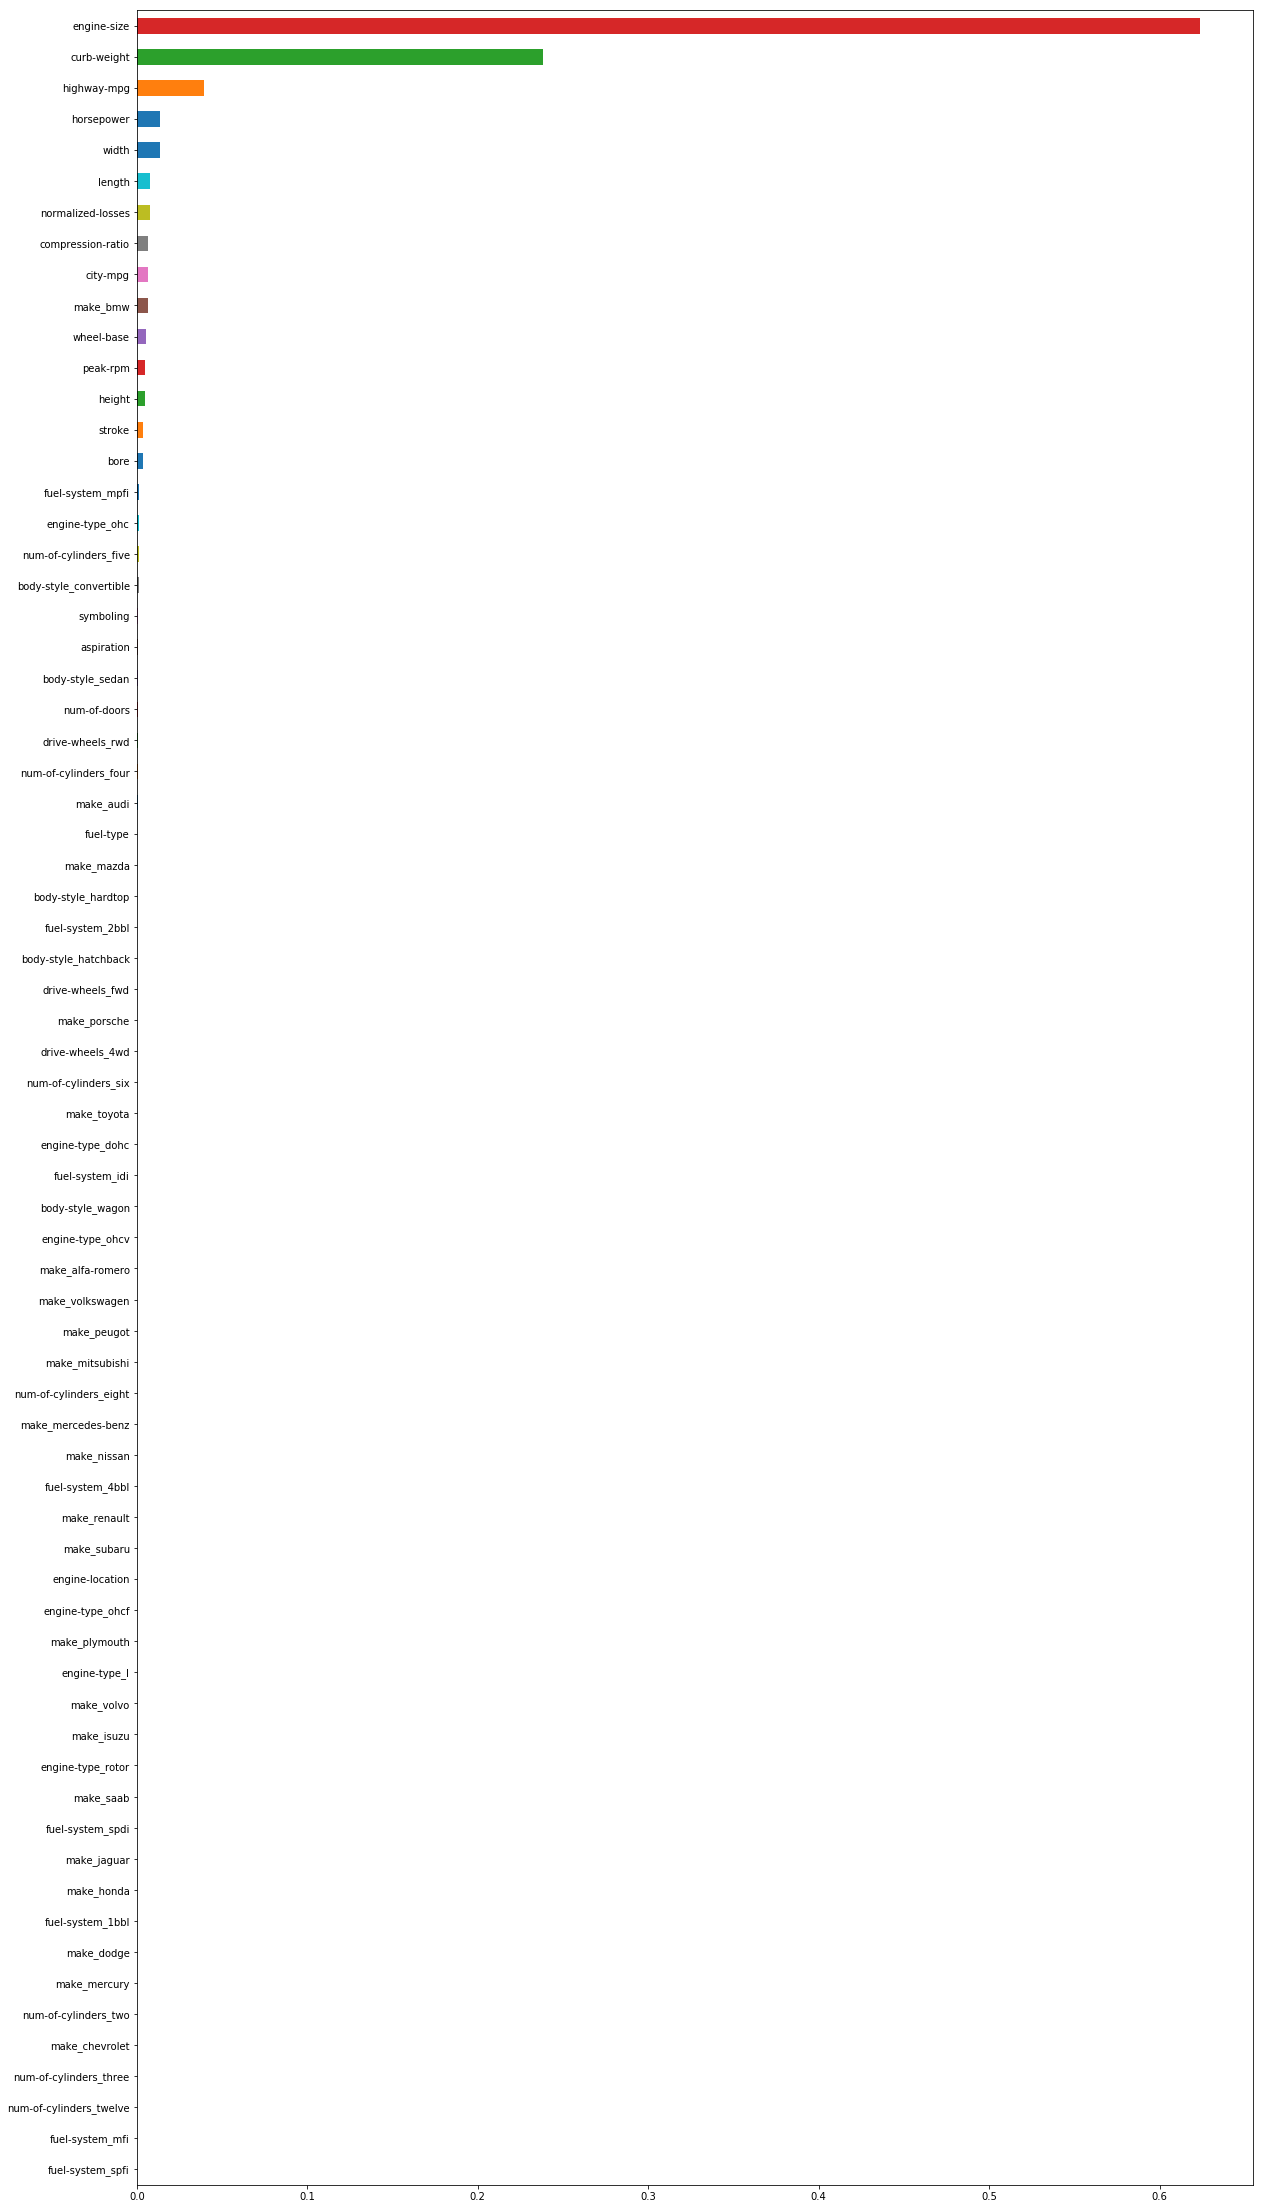

In [25]:
model = RandomForestRegressor(n_estimators=100, n_jobs=-1)
model.fit(features_df, target_ser)
plt.figure(figsize=(20, 40))
feature_importances_ser = pd.Series(model.feature_importances_, index=features_df.columns.values)
feature_importances_ser.sort_values().plot(kind='barh')

In [26]:
features_to_use = feature_importances_ser.sort_values(ascending=False).index.values[:15]
features_to_use

array(['engine-size', 'curb-weight', 'highway-mpg', 'horsepower', 'width',
       'length', 'normalized-losses', 'compression-ratio', 'city-mpg',
       'make_bmw', 'wheel-base', 'peak-rpm', 'height', 'stroke', 'bore'],
      dtype=object)